# Problem 1: CNN classificaiton

###### Construct a CNN to classify the images in the MRI dataset. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 
import tensorflow as tf
from tensorflow import keras

In [2]:
file_dir = '/Users/sakshisuman12/Desktop/saint.math.1729/GitHub/msam-northeastern/MATH7243/Labs/MRI_Images/'

labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [3]:
data = np.zeros([609, 30976])
for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

In [4]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(data, y, test_size=0.2, random_state=0)


In [5]:
## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train1.astype('float32')
X_test = x_test1.astype('float32')
X_train /= 255.0
X_test /= 255.0

NUM_LABELS = 4

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train1, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test1, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train1.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train1.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 30976)
X_train: (487, 30976)
y_train: (487,)
Y_train: (487, 4)


In [6]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(176,176,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Metal device set to: Apple M1 Max


2022-04-02 13:57:54.368441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-02 13:57:54.368643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 170, 32)      1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 83, 83, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 41, 41, 32)        0         
                                                                 
 flatten (Flatten)           (None, 53792)             0

In [7]:
X_train = X_train.reshape(-1, 176, 176, 1)
X_test = X_test.reshape(-1, 176, 176, 1)

In [8]:
tf.config.run_functions_eagerly(True)
epochs = 5

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/5


/Users/sakshisuman12/miniforge3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
2022-04-02 13:57:56.410293: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 8s 1s/step - loss: 0.8569 - accuracy: 0.6653 - val_loss: 0.7031 - val_accuracy: 0.8279
Epoch 2/5
4/4 [==============================] - 1s 347ms/step - loss: 0.5340 - accuracy: 0.8665 - val_loss: 0.5605 - val_accuracy: 0.8279
Epoch 3/5
4/4 [==============================] - 1s 237ms/step - loss: 0.4853 - accuracy: 0.8768 - val_loss: 0.5963 - val_accuracy: 0.8279
Epoch 4/5
4/4 [==============================] - 1s 232ms/step - loss: 0.4521 - accuracy: 0.8768 - val_loss: 0.5073 - val_accuracy: 0.8279
Epoch 5/5
4/4 [==============================] - 1s 231ms/step - loss: 0.4422 - accuracy: 0.8768 - val_loss: 0.5132 - val_accuracy: 0.8279


In [9]:
# saving the model
import os

SAVE_DIR = "./"
MODEL_NAME = 'keras_mnist.h5'
model_path = os.path.join(SAVE_DIR, MODEL_NAME)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./keras_mnist.h5 


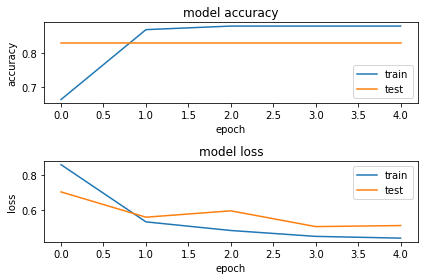

In [10]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# Problem 2: Pretrained Networks



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils
import keras
import sys
import sklearn
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.8.0


In [12]:
def preprocess(image):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image

In [13]:
file_dir = '/Users/sakshisuman12/Desktop/saint.math.1729/GitHub/msam-northeastern/MATH7243/Labs/MRI_Images/'
labels = pd.read_csv(file_dir + 'labels.csv',index_col=0)
display(labels)
y = labels.CDR

data = np.zeros([609,224,224,3])
for n, file_name in enumerate(labels.Filename):
    data[n,:] = preprocess(matplotlib.image.imread(file_dir + file_name)[:,:,0:3].reshape(1,176,176,3))

,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [15]:
dicty = {0: 'type0', 0.5: 'type0.5', 1: 'type1', 2: 'type2'}
dicty2 = {'type0': 0, 'type0.5': 1, 'type1': 2, 'type2': 3}
y_train = y_train.replace(dicty)
y_train = y_train.replace(dicty2)

In [16]:
NUM_LABELS = 4
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 224, 224, 3)
X_train: (487, 224, 224, 3)
y_train: (487,)
Y_train: (487, 4)


In [17]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_se

 lization)                      728)                                                              
                                                                                                  
 add_4 (Add)                    (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_3[0][0]']                  
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_4[0][0]']                  
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_7 (Add)                    (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
          

                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_s

                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
          

 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_4 (Conv2D)              (None, None, None,   186368      ['add_1[0][0]']                  
          

                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_se

 lization)                      728)                                                              
                                                                                                  
 add_7 (Add)                    (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_7[0][0]']                  
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_10 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
          

In [18]:
epochs = 20
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    verbose=1,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/20


/Users/sakshisuman12/miniforge3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 19s 2s/step - loss: 1.1651 - accuracy: 0.4661 - val_loss: 0.5143 - val_accuracy: 0.5410
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 1.0915 - accuracy: 0.5791 - val_loss: 0.6971 - val_accuracy: 0.5410
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 1.0196 - accuracy: 0.5791 - val_loss: 0.7920 - val_accuracy: 0.5410
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 1.0473 - accuracy: 0.5791 - val_loss: 0.6538 - val_accuracy: 0.5410
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 1.0216 - accuracy: 0.5791 - val_loss: 0.6037 - val_accuracy: 0.5410
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 1.0104 - accuracy: 0.5791 - val_loss: 0.6976 - val_accuracy: 0.5410
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 1.0225 - accuracy: 0.5791 - val_loss: 0.7139 - val_accuracy: 0.5410
Epoch 8/20
4/4 [==============================] - 8

In [19]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MRI data loaded: train: 487 test: 122
x_train: (487, 224, 224, 3)
X_train: (487, 224, 224, 3)
y_train: (487,)
Y_train: (487, 4)


In [20]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_se

 lization)                      728)                                                              
                                                                                                  
 add_16 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_15[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_16[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_19 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
          

                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_s

                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
          

 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_8 (Conv2D)              (None, None, None,   186368      ['add_13[0][0]']                 
          

                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_se

 lization)                      728)                                                              
                                                                                                  
 add_19 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_18[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_19[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_22 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
          

In [21]:
ids = list(set(labels.ID))


random.shuffle(ids)
ids_train = ids[:123]
ids_test = ids[123:]
tr_len = len(ids_train)
ts_len = len(ids_test)
print('Train Length:',tr_len)
print('Test Length:',ts_len)

X_train = np.zeros([369,224,224,3])
y_train = []
for n, ID in enumerate(ids_train):
    y_train = y_train + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        tmp=matplotlib.image.imread(file_name)[:,:,0:3].reshape(1,176,176,3)
        X_train[3*n+i,:,:,:] = preprocess(tmp)
y_train=np.array(y_train)

print(len(y_train))

X_test = np.zeros([240,224,224,3])
y_test = []
for n, ID in enumerate(ids_test):
    y_test = y_test + list(y[labels.ID == ID])
    
    for i, s in enumerate(["_55", "_120", "_180"]):
        file_name = file_dir + ID + s + '.png'
        tmp=matplotlib.image.imread(file_name)[:,:,0:3].reshape(1,176,176,3)
        X_test[3*n+i,:,:,:] = preprocess(tmp)
y_test=np.array(y_test)
print(len(y_test))

NUM_LABELS=4
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

Train Length: 123
Test Length: 80
369
240


In [22]:
print('MRI data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)

MRI data loaded: train: 369 test: 240
x_train: (487, 224, 224, 3)
X_train: (369, 224, 224, 3)
y_train: (369,)
Y_train: (369, 4)


In [23]:
n_classes=NUM_LABELS
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()
for layer in base_model.layers:
    layer.trainable = False
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_se

 lization)                      728)                                                              
                                                                                                  
 add_28 (Add)                   (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_27[0][0]']                 
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_28[0][0]']                 
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
          

                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_s

                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                               
                                                                                                  
 block1_conv1_act (Activation)  (None, None, None,   0           ['block1_conv1_bn[0][0]']        
                                32)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   18432       ['block1_conv1_act[0][0]']       
                                64)                                                               
          

 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, None, None,   536536     ['block4_sepconv2_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv2[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 conv2d_12 (Conv2D)             (None, None, None,   186368      ['add_25[0][0]']                 
          

                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block7_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block7_sepconv2_act (Activatio  (None, None, None,   0          ['block7_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block7_se

 lization)                      728)                                                              
                                                                                                  
 add_31 (Add)                   (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
                                728)                              'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, None, None,   0          ['add_31[0][0]']                 
 on)                            728)                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, None, None,   536536     ['block10_sepconv1_act[0][0]']   
 v2D)                           728)                                                              
          

 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, None, None,   536536     ['block12_sepconv3_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv3[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 add_34 (Add)                   (None, None, None,   0           ['block12_sepconv3_bn[0][0]',    
          

In [24]:
from tensorflow.keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [25]:
from tensorflow.keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

In [26]:
# OHE target column
train_target = Y_train
val_target = Y_test

In [27]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(4, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
model2.fit(vgg_features_train, train_target, epochs=50, batch_size=128, validation_data=(vgg_features_val, val_target))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 100)               2508900   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 2,509,704
Trainable params: 2,509,504
Non-trainable params: 200
__________________________________________

In [28]:
model2.evaluate(vgg_features_val,val_target)

8/8 [==============================] - 0s 17ms/step - loss: 0.4281 - accuracy: 0.8750


[0.428114652633667, 0.8750000596046448]

# The accuracy of our model has increased to 87.5 %.